# Heart Disease Analysis and Prediction using Feature Selection Algorthim and ML

# Importing Package

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the data 
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Checking for any missing values 
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

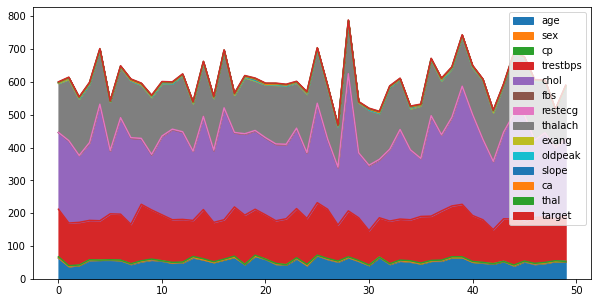

In [6]:
data.head(50).plot(kind='area',figsize=(10,5))

<AxesSubplot:>

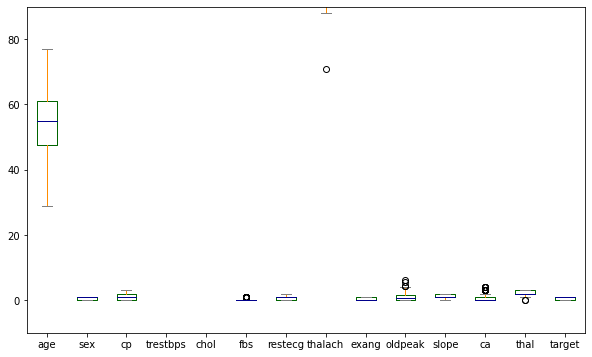

In [7]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
data.plot(kind='box',figsize=(10,6),color=color,ylim=[-10,90])

In [8]:
print(data.shape)

(303, 14)


In [9]:
X = data.iloc[:, 0:13]
y = data.iloc[:,13]

# Feature Selection Techniques in Machine Learning

# SelectKBest Algorithm

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_cat = X.astype(int)

chi2_features = SelectKBest(chi2, k=12)
X_train = chi2_features.fit_transform(X_cat,y)

In [11]:
print(X_cat.shape)
print(X_train.shape)

(303, 13)
(303, 12)


# Lasso Feature Selection

In [12]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(303, 14)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler()

In [15]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [16]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=LogisticRegression(C=1))

In [17]:
sel_.get_support()

array([False,  True,  True, False, False, False, False,  True, False,
        True, False,  True,  True])

In [18]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 13
selected features: 6
features with coefficients shrank to zero: 0


In [19]:
np.sum(sel_.estimator_.coef_ == 0)

0

In [20]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index([], dtype='object')

In [21]:
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))
X_train_selected.shape, X_test_selected.shape


((212, 6), (91, 6))

# with Lasso Selected Features

# Support Vector Machine 

In [26]:
from sklearn import svm
svm_clf = svm.SVC(kernel ='linear')
svm_clf.fit(X_train_selected,y_train)
y_pred_svm =svm_clf.predict(X_test_selected)

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[35,  9],
       [ 7, 40]])

In [28]:
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)

Accuracy : 0.8241758241758241


In [33]:
recall_svm = cm_svm[0][0]/(cm_svm[0][0] + cm_svm[0][1])
precision_svm = cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])
recall_svm,precision_svm

(0.7954545454545454, 0.4666666666666667)

# KNeighbors Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors =5,n_jobs = -1,leaf_size = 60,algorithm='brute')
knn_clf.fit(X_train_selected,y_train)
y_pred_knn = knn_clf.predict(X_test_selected)
y_pred_knn

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0])

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[30, 14],
       [10, 37]])

In [32]:
knn_result = accuracy_score(y_test,y_pred_knn)
knn_result

0.7362637362637363

In [34]:
recall_knn = cm_knn[0][0]/(cm_knn[0][0] + cm_knn[0][1])
precision_knn = cm_knn[0][0]/(cm_knn[0][0]+cm_knn[1][1])
recall_knn,precision_knn

(0.6818181818181818, 0.44776119402985076)

# MLP Classifier

In [35]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
ann_clf = MLPClassifier()

#Parameters
parameters = {'solver': ['lbfgs'],
             'alpha':[1e-4],
             'hidden_layer_sizes':(9,14,14,2),   # 9 input, 14-14 neuron in 2 layers,1 output layer
             'random_state': [1]}

In [37]:
# Type of scoring to compare parameter combos 
acc_scorer = make_scorer(accuracy_score)

# Run grid search 
grid_obj = GridSearchCV(ann_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train_selected, y_train)

# Pick the best combination of parameters
ann_clf = grid_obj.best_estimator_

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [38]:
# Fit the best algorithm to the data 
ann_clf.fit(X_train_selected, y_train)

MLPClassifier(hidden_layer_sizes=14, random_state=1, solver='lbfgs')

In [40]:
y_pred_ann = ann_clf.predict(X_test_selected)

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)
cm_ann

array([[34, 10],
       [ 6, 41]])

In [42]:
ann_result = accuracy_score(y_test,y_pred_ann)
ann_result

0.8241758241758241

In [43]:
recall_ann = cm_ann[0][0]/(cm_ann[0][0] + cm_ann[0][1])
precision_ann = cm_ann[0][0]/(cm_ann[0][0]+cm_ann[1][1])
recall_ann,precision_ann

(0.7727272727272727, 0.4533333333333333)

# RNN - CNN

In [48]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(6, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
#classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train_selected, y_train, batch_size = 10, epochs = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test_selected)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_annk = confusion_matrix(y_test, y_pred)

Epoch 1/100
22/22 [==============================] - 0s 9ms/step - loss: 19.1724 - accuracy: 0.5566
Epoch 2/100
22/22 [==============================] - 0s 9ms/step - loss: 12.4810 - accuracy: 0.5566
Epoch 3/100
22/22 [==============================] - 0s 9ms/step - loss: 6.0293 - accuracy: 0.5566
Epoch 4/100
22/22 [==============================] - 0s 8ms/step - loss: 1.4256 - accuracy: 0.4387
Epoch 5/100
22/22 [==============================] - 0s 9ms/step - loss: 1.0029 - accuracy: 0.4575
Epoch 6/100
22/22 [==============================] - 0s 9ms/step - loss: 0.9780 - accuracy: 0.3113
Epoch 7/100
22/22 [==============================] - 0s 9ms/step - loss: 0.9191 - accuracy: 0.3302
Epoch 8/100
22/22 [==============================] - 0s 10ms/step - loss: 0.8742 - accuracy: 0.3679
Epoch 9/100
22/22 [==============================] - 0s 9ms/step - loss: 0.8656 - accuracy: 0.4104
Epoch 10/100
22/22 [==============================] - 0s 9ms/step - loss: 0.8355 - accuracy: 0.3774
Epoch 

22/22 [==============================] - 0s 6ms/step - loss: 0.3794 - accuracy: 0.8396
Epoch 83/100
22/22 [==============================] - 0s 6ms/step - loss: 0.3743 - accuracy: 0.8443
Epoch 84/100
22/22 [==============================] - 0s 8ms/step - loss: 0.3813 - accuracy: 0.8255
Epoch 85/100
22/22 [==============================] - 0s 6ms/step - loss: 0.3886 - accuracy: 0.8396
Epoch 86/100
22/22 [==============================] - 0s 6ms/step - loss: 0.3928 - accuracy: 0.8349
Epoch 87/100
22/22 [==============================] - 0s 6ms/step - loss: 0.3808 - accuracy: 0.8443
Epoch 88/100
22/22 [==============================] - 0s 7ms/step - loss: 0.3972 - accuracy: 0.8396
Epoch 89/100
22/22 [==============================] - 0s 6ms/step - loss: 0.3893 - accuracy: 0.8160
Epoch 90/100
22/22 [==============================] - 0s 6ms/step - loss: 0.4132 - accuracy: 0.8160
Epoch 91/100
22/22 [==============================] - 0s 6ms/step - loss: 0.4166 - accuracy: 0.8396
Epoch 92/100


In [49]:
cm_annk

array([[33, 11],
       [ 6, 41]])

In [50]:
recall_annk = cm_annk[0][0]/(cm_annk[0][0] + cm_annk[0][1])
precision_annk = cm_annk[0][0]/(cm_annk[0][0]+cm_annk[1][1])
recall_annk,precision_annk

(0.75, 0.44594594594594594)

# Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_selected, y_train)
y_pred_rf =RF.predict(X_test_selected)

In [53]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[33, 11],
       [ 4, 43]])

In [54]:
from sklearn.metrics import accuracy_score
rf_result = accuracy_score(y_test,y_pred_rf)
print("Accuracy :",svm_result)
recall_rf = cm_rf[0][0]/(cm_rf[0][0] + cm_rf[0][1])
precision_rf = cm_rf[0][0]/(cm_rf[0][0]+cm_rf[1][1])
recall_rf,precision_rf

Accuracy : 0.8241758241758241


(0.75, 0.4342105263157895)

# Decision Tree Classifier

In [56]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train_selected, y_train)
y_pred_DT =DT.predict(X_test_selected)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_DT = confusion_matrix(y_test, y_pred_DT)
from sklearn.metrics import accuracy_score
DT_result = accuracy_score(y_test,y_pred_DT)
print("Accuracy :",DT_result)
recall_DT = cm_DT[0][0]/(cm_DT[0][0] + cm_DT[0][1])
precision_DT = cm_DT[0][0]/(cm_DT[0][0]+cm_DT[1][1])
recall_DT,precision_DT

Accuracy : 0.7692307692307693


(0.7272727272727273, 0.45714285714285713)

# Gaussian Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train_selected, y_train)
y_pred_NB =NB.predict(X_test_selected)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(y_test, y_pred_NB)
from sklearn.metrics import accuracy_score
NB_result = accuracy_score(y_test,y_pred_NB)
print("Accuracy :",NB_result)
recall_NB = cm_NB[0][0]/(cm_NB[0][0] + cm_NB[0][1])
precision_NB = cm_NB[0][0]/(cm_NB[0][0]+cm_NB[1][1])
recall_NB,precision_NB

Accuracy : 0.8131868131868132


(0.75, 0.44594594594594594)

# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train_selected, y_train)
y_pred_LR =LR.predict(X_test_selected)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
from sklearn.metrics import accuracy_score
LR_result = accuracy_score(y_test,y_pred_LR)
print("Accuracy :",LR_result)
recall_LR = cm_LR[0][0]/(cm_LR[0][0] + cm_LR[0][1])
precision_LR = cm_LR[0][0]/(cm_LR[0][0]+cm_LR[1][1])
recall_LR,precision_LR

Accuracy : 0.8241758241758241


(0.7727272727272727, 0.4533333333333333)

# Accuracy Precision & Recall Comparsion

In [60]:
results ={'Accuracy': [svm_result*100,knn_result*100,ann_result*100,rf_result*100,DT_result*100,NB_result*100,LR_result*100],
          'Recall': [recall_svm*100,recall_knn*100,recall_ann*100,recall_rf*100,recall_DT*100,recall_NB*100,recall_LR*100],
          'Precision': [precision_svm*100,precision_knn*100,precision_ann*100,precision_rf*100,precision_DT*100,precision_NB*100,precision_LR*100]}
index = ['SVM','KNN','ANN','RFC','DT','GNB','LR']

In [61]:
results =pd.DataFrame(results,index=index)

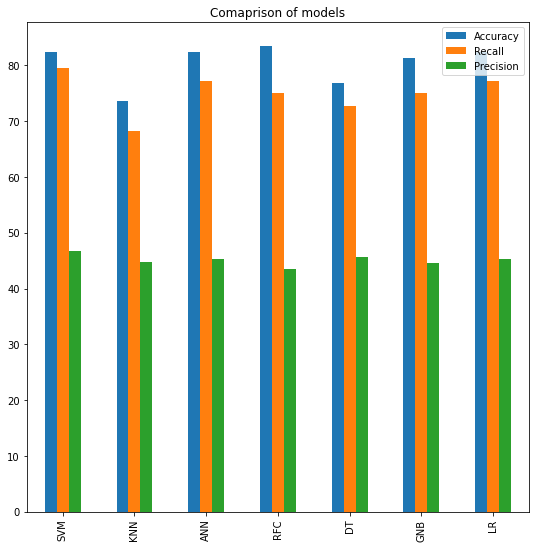

In [62]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(9,9)).get_figure()
fig.savefig('Final Result.png')


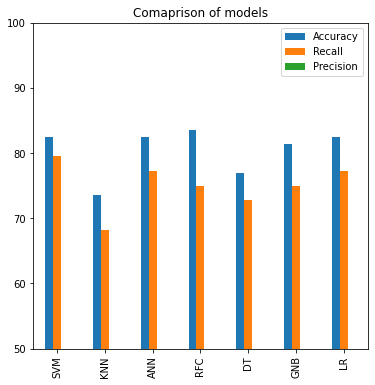

In [63]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(6,6),ylim=[50,100]).get_figure()
fig.savefig('image.png')

array([<AxesSubplot:title={'center':'Accuracy'}>,
       <AxesSubplot:title={'center':'Recall'}>,
       <AxesSubplot:title={'center':'Precision'}>], dtype=object)

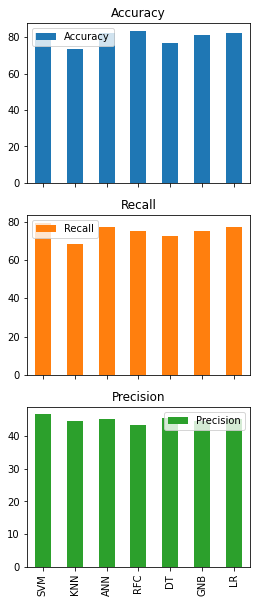

In [64]:
results.plot(subplots=True,kind ='bar',figsize=(4,10))

In [68]:
#import joblib
#filename = 'model.sav'
#joblib.dump(RF, filename)